In [1]:
using Distributions
using Random
using Plots

In [2]:
p = [0.1, 0.9]

2-element Array{Float64,1}:
 0.1
 0.9

In [3]:
m = Multinomial(32, p)

Multinomial{Float64,Array{Float64,1}}(n=32, p=[0.1, 0.9])

In [4]:
srand(9636)

UndefVarError: UndefVarError: srand not defined

In [5]:
rand(m, 3)

2×3 Array{Int64,2}:
  3   2   3
 29  30  29

In [52]:
function draw_dirichlet_multinomial(n::Integer, α::Vector{T1}, T::Real, K::Integer) where {T1 <: Real}
    cdf = DirichletMultinomial(n, T .* α ./ sum(α))
    return rand(cdf, K)
end

draw_dirichlet_multinomial (generic function with 1 method)

In [53]:
K = 3
p = [0.7, 0.2, 0.1]
T = 0.1
Xk = draw_dirichlet_multinomial(10, p, T, 10000)

3×10000 Array{Int64,2}:
 0  10  10   0   0   0  10  10  10  10  …  10   0  10  10  10  10   0  10   0
 4   0   0  10  10  10   0   0   0   0      0   0   0   0   0   0  10   0   0
 6   0   0   0   0   0   0   0   0   0      0  10   0   0   0   0   0   0  10

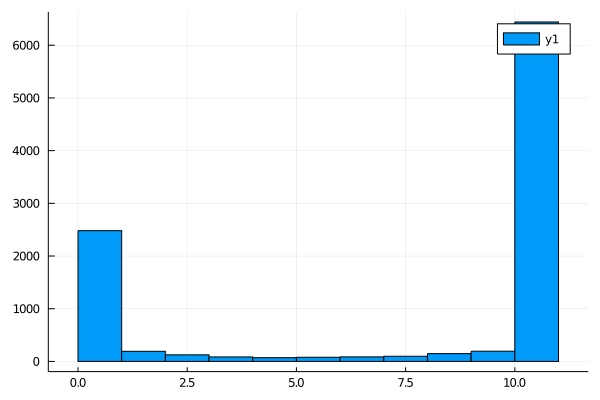

In [9]:
histogram(Xk[1,:])

In [10]:
function compute_KLD(Xk::Array{Int64,2}, p::Vector{Float64})
    share = Xk ./ sum(Xk, dims=1)
    deviation = log.(share ./ p)
    # log(0) is fine because 0*log(0) = 0
    replace!(deviation, -Inf=>0)
    # convert to vector instead of 1xK array
    return vec(sum(share .* deviation, dims=1))
end

compute_KLD (generic function with 1 method)

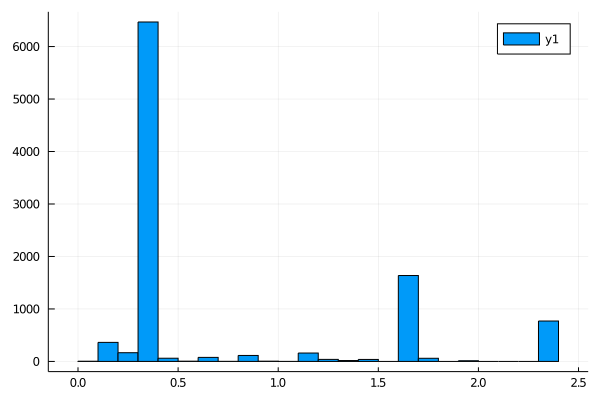

In [11]:
KLD = compute_KLD(Xk, p)
histogram(KLD)

In [15]:
pwd()

"/Users/koren/Tresorit/projects/economic-diplomacy/analysis"

In [46]:
include("./polya.jl")
using .Polya

In [57]:
cdf = Polya.estimate_dirichlet_multinomial(Xk, maxiter=1000)

DirichletMultinomial{Float64}(n=100000, α=[0.06776684625247496, 0.018286225841054094, 0.0111634974015692])

In [36]:
typeof(Xk)

Array{Int64,2}

In [ ]:
Xk

In [ ]:
size(Xk, dims=1)

In [37]:
A = ones(2, 3, 4)

2×3×4 Array{Float64,3}:
[:, :, 1] =
 1.0  1.0  1.0
 1.0  1.0  1.0

[:, :, 2] =
 1.0  1.0  1.0
 1.0  1.0  1.0

[:, :, 3] =
 1.0  1.0  1.0
 1.0  1.0  1.0

[:, :, 4] =
 1.0  1.0  1.0
 1.0  1.0  1.0

In [ ]:
N = 3
sum(A, dims=2:N)

In [ ]:
length(size(A))

In [49]:
Xk = ones(Int, 2, 3, 4)
Xk[1] = 0

0

In [51]:
Polya.estimate_dirichlet_multinomial(Xk, maxiter=100000)

DirichletMultinomial{Float64}(n=23, α=[45748.392697121526, 49907.33748776891])

In [21]:
dims = size(Xk)

(3, 10000)

In [22]:
dims[2] = 1

MethodError: MethodError: no method matching setindex!(::Tuple{Int64,Int64}, ::Int64, ::Int64)

In [23]:
dims = ones(Int, 2)

2-element Array{Int64,1}:
 1
 1

In [24]:
dims[1] = 3

3

In [28]:
p

3-element Array{Float64,1}:
 0.7
 0.2
 0.1

In [30]:
reshape(p, dims...)

3×1 Array{Float64,2}:
 0.7
 0.2
 0.1

In [31]:
dims...

ErrorException: syntax: "..." expression outside call